# LOGISTIC REGRESSION MODEL for predicting Customer Loyalty Score using manual calculation

_Data is from https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors/data_

__About Dataset__

customer_id: Unique ID of the customer.<br>
age: The age of the customer.<br>
annual_income: The customer's annual income (in USD).<br>
purchase_amount: The total amount of purchases made by the customer (in USD).<br>
purchase_frequency: Frequency of customer purchases (number of times per year).<br>
region: The region where the customer lives (North, South, East, West).<br>
loyalty_score: Customer's loyalty score (a value between 0-100).

__Problem Statement:__<br>
Based on existing data detailing the age, annual income, purchase amount, purchase frequency, and region of a new customer, predict the customer's loyalty score in order to if the customer is likely to organically build loyalty with the brand or if they may require extra services in order to build loyalty with the brand. 

__Caveat:__<br>
Manual iterative calculations were developed instead of typical machine learning libraries in order to test and demonstrate mastery with the fundamentals of supervised learning, particularly with linear and logistic regression models.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## STEP 1. DATA PREPROCESS

Choose features: age, annual income, purchase amount, purchase frequency<br>
Choose target: loyalty score<br>

In [4]:
data_path = "/kaggle/input/customer-purchasing-behaviors/Customer Purchasing Behaviors.csv"
df = pd.read_csv(data_path)
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,39,57000,440,7.0,South,21
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


Choose features: age, annual income, purchase amount, purchase frequency<br>
Choose target: loyalty score<br>
Choose s = 0.1: 90-10 train-test data split

In [4]:
features  = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']
target    = ['loyalty_score']

x = np.array(df[features])
y = np.array(df[target])

m = y.size

print("Size of dataset:",m)
print("Size of x:",x.shape)
print("Size of y:",y.shape)

def create_test_data(x, y, m, split):
    split_index = math.ceil(m * split)
    
    x_train = x[split_index:] 
    y_train = y[split_index:]
    x_test = x[:split_index]
    y_test = y[:split_index]
    
    return x_train, y_train, x_test, y_test, m-split_index, split_index

x_train, y_train, x_test, y_test, m_train, m_test= create_test_data(x, y, m, 0.1)

print("m_train:", m_train)
print("Size of x_train:", x_train.shape)
print("Size of y_train:", y_train.shape)
print("m_test:", m_test)
print("Size of x_test:", x_test.shape)
print("Size of y_test:", y_test.shape)

Size of dataset: 238
Size of x: (238, 4)
Size of y: (238, 1)
m_train: 214
Size of x_train: (214, 4)
Size of y_train: (214, 1)
m_test: 24
Size of x_test: (24, 4)
Size of y_test: (24, 1)


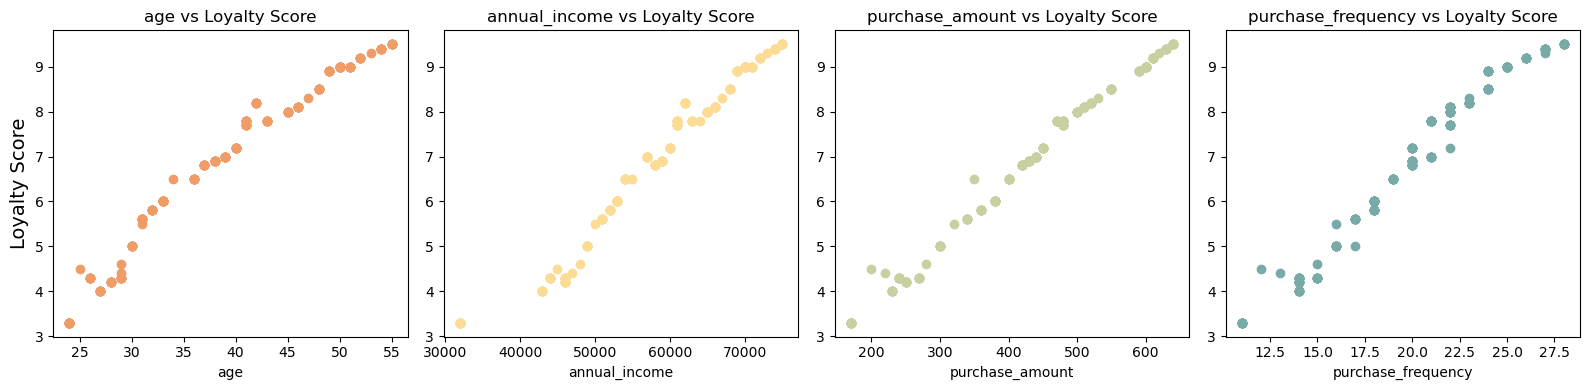

In [4]:
color = ['#EF9C66', '#FCDC94', '#C8CFA0', '#78ABA8']
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, ax in enumerate(axes):
    ax.scatter(x_train[:, i], y_train, color=color[i])
    ax.set_title(f'{features[i]} vs Loyalty Score')
    ax.set_xlabel(features[i])
    if i == 0:
        ax.set_ylabel('Loyalty Score', fontsize=14)

plt.tight_layout()
plt.show()

## STEP 2. NORMALILZATION

using Z-score

In [5]:
def z_score_normalize(x):
    mu     = np.mean(x, axis=0)
    sigma  = np.std(x, axis=0)
    x_norm = (x - mu) / sigma
    return x_norm, mu, sigma

x_norm, mu, sigma = z_score_normalize(x_train)
print(mu, sigma)

[3.90514019e+01 5.78738318e+04 4.31822430e+02 1.99953271e+01] [9.29788303e+00 1.12394485e+04 1.38040175e+02 4.51218254e+00]


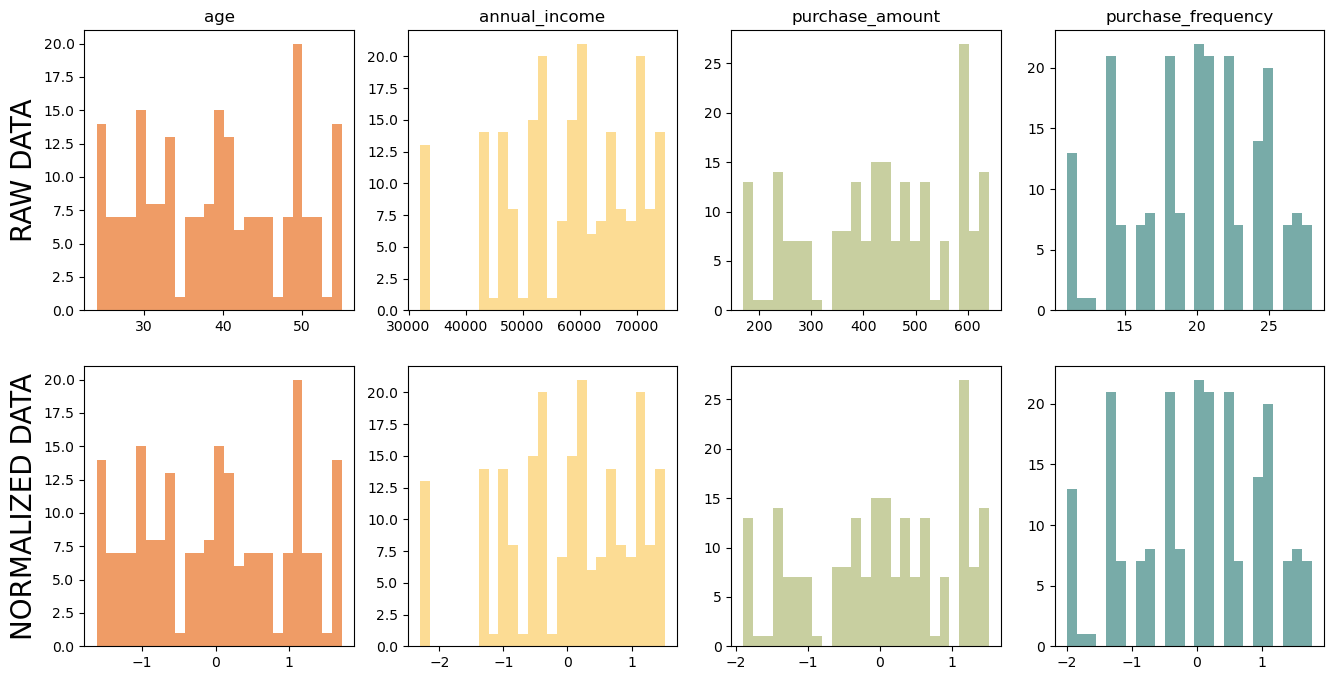

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axes[0]):
    ax.hist(x_train[:, i], bins=25, color=color[i])
    ax.set_title(features[i])
    if i == 0: ax.set_ylabel('RAW DATA', fontsize=20)

for i, ax in enumerate(axes[1]):
    ax.hist(x_norm[:, i], bins=25, color=color[i])
    if i == 0: ax.set_ylabel('NORMALIZED DATA', fontsize=20)

plt.show()

The plots above show that the data was properly normalized.

## STEP 3. COST AND GRADIENT

In [7]:
def compute_cost(x,y,w,b,lambda_):
    cost, total_cost, reg_cost = 0,0,0
    
    m = x.shape[0]
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        cost += (f_wb - y[i])**2
    total_cost += 1 / (2 * m) * cost
    
    if lambda_ == 0: return total_cost

    n = len(w)
    for j in range(n):
        reg_cost += (w[j]**2)
    reg_cost *= (lambda_/(2*m))
    
    total_cost += reg_cost
    
    return total_cost

w = np.array([10, 10, 10, 10], dtype=np.float64)
b = 10

total_cost = compute_cost(x_norm,y_train,w,b,1)
print(total_cost)

[723.96910518]


In [8]:
def compute_gradient(x,y,w,b): 
    dj_dw,dj_db = 0,0
    
    m = x.shape[0]  
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

dj_dw, dj_db = compute_gradient(x_norm,y_train,w,b)

print(dj_dw, dj_db)

[37.58239244 37.61013087 37.78386149 37.72850386] [3.13738318]


## STEP 4. GRADIENT DESCENT

In [9]:
def gradient_descent(x,y,w,b,alpha,lambda_,iterations):
    m = x.shape[0]
    J_history = []
    w_history = []
    
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        cost = compute_cost(x,y,w,b,m)
        J_history.append(cost)
        
        if i % math.ceil(iterations/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history

alpha = 0.01
lambda_ = 1
iterations = 1000
w, b, J_history, w_history = gradient_descent(x_norm,y_train,w,b,alpha,lambda_,iterations)
print(w,b)

Iteration    0: Cost   852.49   
Iteration  100: Cost     1.68   
Iteration  200: Cost     0.56   
Iteration  300: Cost     0.48   
Iteration  400: Cost     0.47   
Iteration  500: Cost     0.47   
Iteration  600: Cost     0.47   
Iteration  700: Cost     0.47   
Iteration  800: Cost     0.47   
Iteration  900: Cost     0.47   
[0.44188806 0.46762103 0.53144636 0.43985721] [6.86275227]


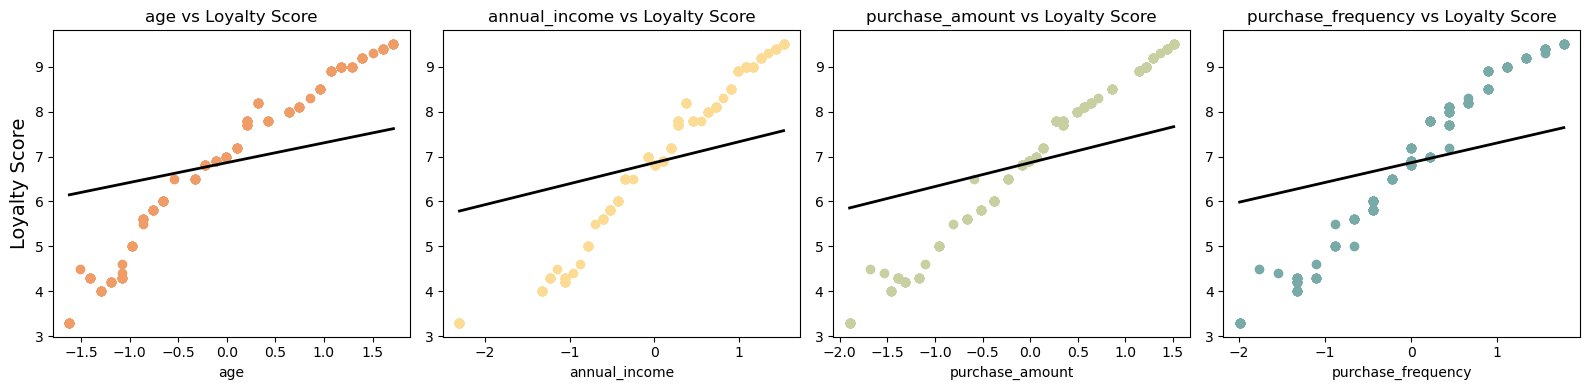

In [10]:
def plot_with_regression_line(x, y, w, b, features):
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    
    for i, ax in enumerate(axes):
        color = ['#EF9C66', '#FCDC94', '#C8CFA0', '#78ABA8'][i]
        ax.scatter(x[:, i], y, color=color)
        
        x_range = np.linspace(x[:, i].min(), x[:, i].max(), 100)
        y_pred = w[i] * x_range + b
        
        ax.plot(x_range, y_pred, color='black', linewidth=2)
        ax.set_title(f'{features[i]} vs Loyalty Score')
        ax.set_xlabel(features[i])
        if i == 0: ax.set_ylabel('Loyalty Score', fontsize=14)
    
    plt.tight_layout()
    plt.show()

features = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']
plot_with_regression_line(x_norm, y_train, w, b, features)

## STEP 5. FINAL PREDICTION RESULTS

In [11]:
def predict(x, w, b):
    x_try_norm = (x - mu) / sigma
    prediction = np.dot(x_try_norm, w) + b
    
    return prediction

def compute_error(y_test, y_pred):
    y_test = y_test.reshape(-1)
    errors = np.abs((y_test - y_pred) / y_test) * 100
    
    print("Target:   Prediction:   Error:")
    for i in range(len(y_test)):
        print(f'{y_test[i]:.2f}      {y_pred[i]:.2f}          {errors[i]:.2f}%')
    
    overall_error = np.mean(errors)
    print(f'Overall Mean Absolute Error: {overall_error:.2f}%')
    
    return overall_error

predictions = predict(x_test, w, b)
overall_error = compute_error(y_test, predictions)

Target:   Prediction:   Error:
7.00      6.95          0.67%
7.00      5.99          14.38%
8.00      7.90          1.25%
3.00      2.83          5.56%
4.80      4.44          7.60%
7.80      7.37          5.53%
6.50      6.34          2.51%
4.20      4.31          2.61%
9.00      9.02          0.25%
5.50      5.43          1.27%
4.40      4.66          5.83%
8.20      7.81          4.79%
6.00      5.98          0.36%
6.80      6.73          1.10%
8.90      8.80          1.15%
3.20      3.06          4.42%
4.50      3.99          11.39%
5.00      5.17          3.33%
8.10      8.03          0.90%
4.30      4.34          0.98%
9.20      9.34          1.49%
3.30      3.28          0.50%
7.50      7.52          0.24%
6.20      6.33          2.16%
Overall Mean Absolute Error: 3.34%
